# Part III: Object-Oriented Programming (OOP)


# Environment Preparation

In [109]:
import pandas as pd
import re
import numpy as np


# III.A Core Classes

# III.B Inheritance & Polymorphism

In [110]:
# Apartment Class

class Apartment:
    def __init__(self, id, price, square_feet, bedrooms, bathrooms, cityname, province, latitude, longitude, amenities):
        self.id = id
        self.price = price
        self.square_feet = square_feet
        self.bedrooms = bedrooms
        self.bathrooms = bathrooms
        self.cityname = cityname
        self.province = province
        self.latitude = latitude
        self.longitude = longitude
        self.amenities = amenities

    def get_summary(self):
        return f"${self.price} | {self.square_feet} square_feet | {self.cityname}, {self.province} | {self.bedrooms} bedrooms"



# Dataset Manager (Parent)

class DatasetManager:
    def __init__(self, filename):
        self.filename = filename
        self.df = None
        self.apartments = []

    def load_data(self):
        self.df = pd.read_csv("rentaldb_ca.csv")
    def parse_amenities(self, txt):
        return str(txt).split(",")

    def validate_postal_code(self, code):
        return bool(re.match(r'^[A-Z]\d[A-Z] \d[A-Z]\d$', str(code).upper()))

    def create_apartments(self):
        for _, r in self.df.iterrows():
            self.apartments.append(Apartment(
                r.get('id'), r.get('price'), r.get('square_feet'),
                r.get('bedrooms'), r.get('bathrooms'),
                r.get('cityname'), r.get('province'),
                r.get('latitude'), r.get('longitude'),
                self.parse_amenities(r.get('amenities'))
            ))



# Subclass + Polymorphism

class PriceAnalysis(DatasetManager):
    def get_summary(self):   # overridden method
        return f"Avg price: ${self.df['price'].mean():.2f}"

    def mean_price(self):
        return self.df['price'].mean()

    def median_price(self):
        return self.df['price'].median()

    def percentile_price(self, q):
        return self.df['price'].quantile(q / 100)



# Run

mgr = PriceAnalysis("rentaldb_ca.csv")
mgr.load_data()
mgr.create_apartments()

print("\033[1m-------Summary of Apartments-------\033[0m") #Heading in bold
print(mgr.apartments[0].get_summary())
print(mgr.apartments[1].get_summary())
print(mgr.apartments[2].get_summary())
print(mgr.apartments[3].get_summary())
print(mgr.apartments[4].get_summary())
print()
print("\033[1m-------Price Analysis-------\033[0m") #Heading in bold
print("Mean price:", mgr.mean_price())
print("Median price:", mgr.median_price())
print("25th percentile:", mgr.percentile_price(25))
print("50th percentile:", mgr.percentile_price(50))
print("75th percentile:", mgr.percentile_price(75))


-------Summary of Apartments-------
$1451.01 | 1145.0 square_feet | Ottawa, ON | 2.0 bedrooms
$1856.45 | 1076.0 square_feet | Edmonton, AB | 2.0 bedrooms
$1345.59 | 353.0 square_feet | Vancouver, BC | 2.0 bedrooms
$3409.37 | 268.0 square_feet | Vancouver, BC | 1.0 bedrooms
$3940.95 | 567.0 square_feet | Montreal, QC | 1.0 bedrooms

-------Price Analysis-------
Mean price: 2557.92489626556
Median price: 2446.8
25th percentile: 1887.86
50th percentile: 2446.8
75th percentile: 3233.74


# Design decision you’d change if this were a production service (and why).


I’d store apartments in a database instead of a CSV and query only what’s needed, so the program can handle large datasets efficiently without slowing down

# Part IV: Visualization Tasks

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("rentaldb_ca.csv")

# 1. Histogram: Distribution of price

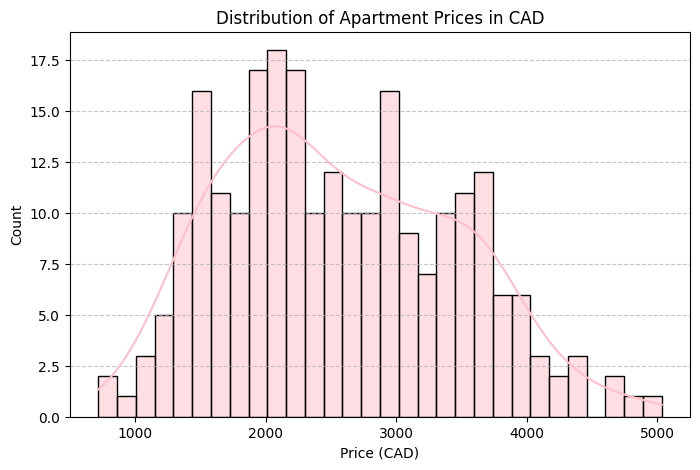

In [117]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='pink')
plt.title("Distribution of Apartment Prices in CAD")
plt.xlabel("Price (CAD)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretation:
Most apartments are in lower price ranges, a few high-price apartments create right skew (outliers).


# 2. Scatter Plot: Square feet vs Price

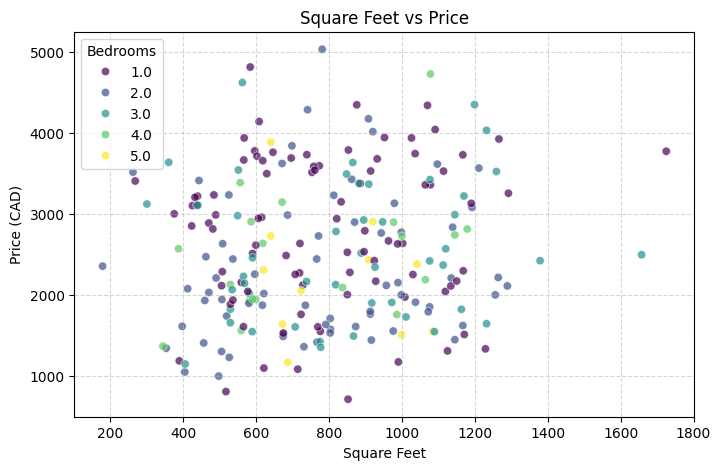

In [114]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='square_feet', y='price', hue='bedrooms', palette='viridis', alpha=0.7)
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price (CAD)")
plt.legend(title='Bedrooms')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Interpretation:
There is a general positive correlation, larger apartments tend to cost more, though some variability exists.


# 3. Bar Chart: Average price by bedrooms

/tmp/ipython-input-3921995567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_bedrooms, x='bedrooms', y='price', palette='pastel')


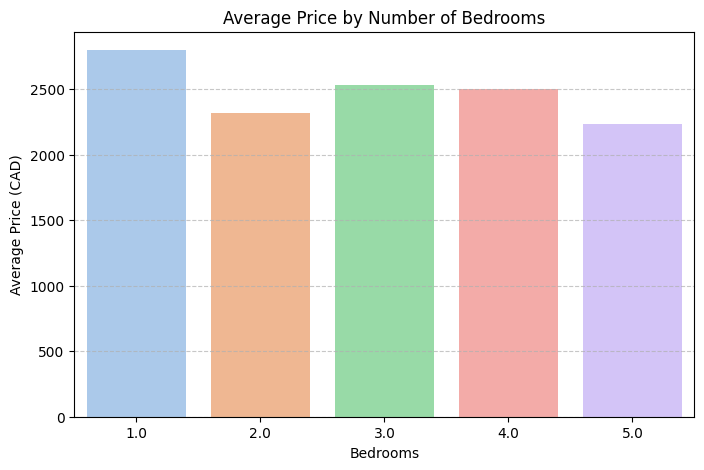

In [118]:
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price_bedrooms, x='bedrooms', y='price', palette='pastel')
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (CAD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretation:
Average price increases with number of bedrooms, showing how apartment size drives cost.


# 4. Heatmap: Correlation among numeric features

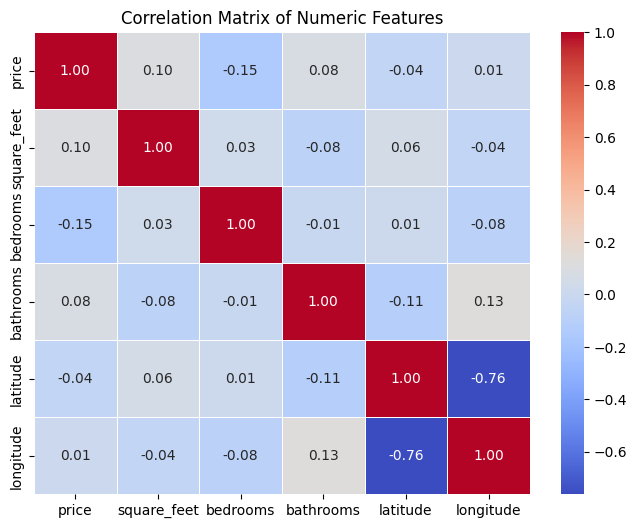

In [116]:
numeric_cols = ['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Interpretation:
Price is positively correlated with square_feet, bedrooms, and bathrooms; latitude/longitude show weak correlations.
